In [1]:
#imports
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import re
#week 3
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
#week 4
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
df = pd.read_csv('training_clean.csv')

In [3]:
df.head() #preview

,target,loc_y_text
0,1,Our Deeds are the Reason of this #earthquake ...
1,1,Forest fire near La Ronge Sask. Canada
2,1,All residents asked to 'shelter in place' are...
3,1,"13,000 people receive #wildfires evacuation o..."
4,1,Just got sent this photo from Ruby #Alaska as...


In [4]:
X = df['loc_y_text']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y, #try to keep proportion of 1 and 0 in both splits
                                                    random_state=17) #random state for reproducability

print( 
X_train.shape,
y_train.shape,
X_test.shape,
y_test.shape) #verify shapes look correct

(5709,) (5709,) (1904,) (1904,)


I'm going to bring in a utility python file that I wrote on another NLP project - it has some functions that will expedite this modeling.

In [5]:
import p3_utils as ut

## Count Vectorizer, Naive Bayes

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   10.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   22.5s
[Parallel(n_jobs=8)]: Done 720 out of 720 | elapsed:   37.8s finished


The best parameters are: {'cvec__max_df': 0.7, 'cvec__max_features': 10000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2), 'cvec__stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',

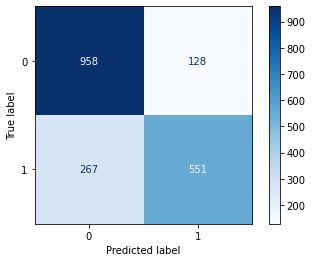

The Accurracy score is 0.7925420168067226
The Sensitivity score is 0.6735941320293398
The Precision score is 0.8114874815905744
____________________
Receiver Operating Characteristic (ROC) curve:


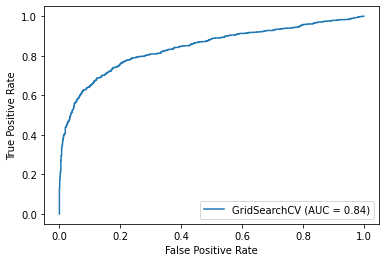

'Model scored!'

In [16]:
nltk_slist = stopwords.words('english')
maxfeats = [10_000, 12_000, 15_000, 20_000] #try different volume of features
mindf = [2, 4, 6] #minimum word frequency to be included in the model
maxdf = [.5, .7, .9] #cutoff for words more frequent than percentage (float) threshhold
ngrams = [(1,2), (1,3)] #range of combinations of words to try (minimum, maximum)
swords = [None, nltk_slist] #try None and a standard stop word list
scaler = 'cvec' #count vectorizer
classifier = 'nb'

pipe = ut.pipemaker(scaler, classifier)
params = ut.set_params(scaler, maxfeats, mindf, maxdf, swords, ngrams)

gs = GridSearchCV(pipe, params, #load hyperparameters
                  n_jobs=8,        #using 8 cores to process
                  cv=5, verbose=1) #using 5 folds and lower verbose to limit messages returned

gs.fit(X_train, y_train)

ut.score_model(gs, X_train, y_train, X_test, y_test)

## Term Frequency Vectorizer, Naive Bayes

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   11.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   25.2s
[Parallel(n_jobs=8)]: Done 720 out of 720 | elapsed:   41.9s finished


The best parameters are: {'tvec__max_df': 0.7, 'tvec__max_features': 10000, 'tvec__min_df': 2, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': None}
The best training score was: 0.7940120734722822
The test score is: 0.7883403361344538
____________________
Confusion Matrix for Test Set:


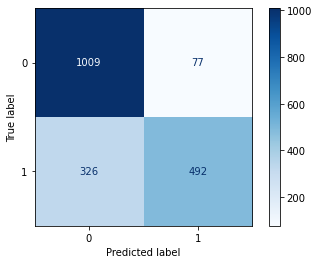

The Accurracy score is 0.7883403361344538
The Sensitivity score is 0.6014669926650367
The Precision score is 0.8646748681898067
____________________
Receiver Operating Characteristic (ROC) curve:


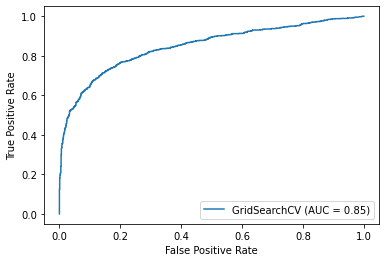

'Model scored!'

In [17]:
nltk_slist = stopwords.words('english')
maxfeats = [10_000, 12_000, 15_000, 20_000] #try different volume of features
mindf = [2, 4, 6] #minimum word frequency to be included in the model
maxdf = [.5, .7, .9] #cutoff for words more frequent than percentage (float) threshhold
ngrams = [(1,2), (1,3)] #range of combinations of words to try (minimum, maximum)
swords = [None, nltk_slist] #try None and a standard stop word list
scaler = 'tvec' #count vectorizer
classifier = 'nb'

pipe = ut.pipemaker(scaler, classifier)
params = ut.set_params(scaler, maxfeats, mindf, maxdf, swords, ngrams)

gs = GridSearchCV(pipe, params, #load hyperparameters
                  n_jobs=8,        #using 8 cores to process
                  cv=5, verbose=1) #using 5 folds and lower verbose to limit messages returned

gs.fit(X_train, y_train)

ut.score_model(gs, X_train, y_train, X_test, y_test)

## Count Vectorizer, Logistic Regression

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    4.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   15.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   35.3s
[Parallel(n_jobs=8)]: Done 720 out of 720 | elapsed:   57.2s finished


The best parameters are: {'cvec__max_df': 0.5, 'cvec__max_features': 10000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2), 'cvec__stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',

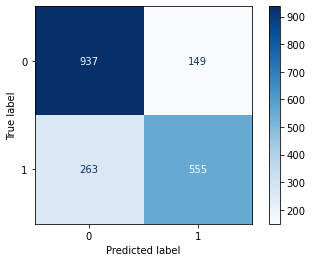

The Accurracy score is 0.7836134453781513
The Sensitivity score is 0.6784841075794621
The Precision score is 0.7883522727272727
____________________
Receiver Operating Characteristic (ROC) curve:


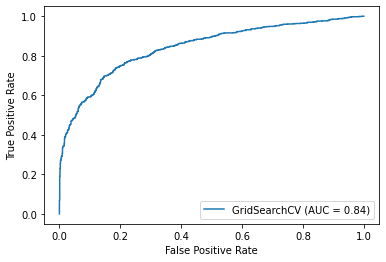

'Model scored!'

In [19]:
nltk_slist = stopwords.words('english')
maxfeats = [10_000, 12_000, 15_000, 20_000] #try different volume of features
mindf = [2, 4, 6] #minimum word frequency to be included in the model
maxdf = [.5, .7, .9] #cutoff for words more frequent than percentage (float) threshhold
ngrams = [(1,2), (1,3)] #range of combinations of words to try (minimum, maximum)
swords = [None, nltk_slist] #try None and a standard stop word list
scaler = 'cvec' #count vectorizer
classifier = 'logreg'

pipe = ut.pipemaker(scaler, classifier)
params = ut.set_params(scaler, maxfeats, mindf, maxdf, swords, ngrams)

gs = GridSearchCV(pipe, params, #load hyperparameters
                  n_jobs=8,        #using 8 cores to process
                  cv=5, verbose=1) #using 5 folds and lower verbose to limit messages returned

gs.fit(X_train, y_train)

ut.score_model(gs, X_train, y_train, X_test, y_test)

## Count Vectorizer, Random Forest

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   20.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  3.9min
[Parallel(n_jobs=8)]: Done 720 out of 720 | elapsed:  6.3min finished


The best parameters are: {'tvec__max_df': 0.5, 'tvec__max_features': 12000, 'tvec__min_df': 4, 'tvec__ngram_range': (1, 3), 'tvec__stop_words': None}
The best training score was: 0.7766716141400529
The test score is: 0.7610294117647058
____________________
Confusion Matrix for Test Set:


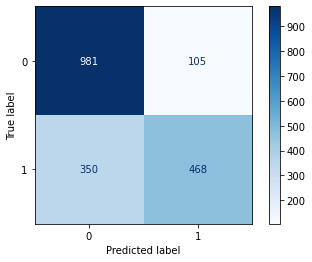

The Accurracy score is 0.7610294117647058
The Sensitivity score is 0.5721271393643031
The Precision score is 0.8167539267015707
____________________
Receiver Operating Characteristic (ROC) curve:


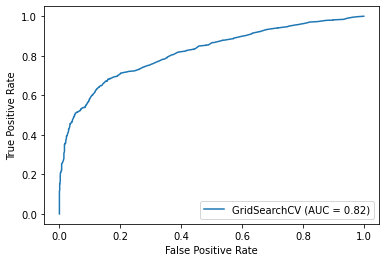

'Model scored!'

In [20]:
nltk_slist = stopwords.words('english')
maxfeats = [10_000, 12_000, 15_000, 20_000] #try different volume of features
mindf = [2, 4, 6] #minimum word frequency to be included in the model
maxdf = [.5, .7, .9] #cutoff for words more frequent than percentage (float) threshhold
ngrams = [(1,2), (1,3)] #range of combinations of words to try (minimum, maximum)
swords = [None, nltk_slist] #try None and a standard stop word list
scaler = 'tvec' #count vectorizer
classifier = 'rf'

pipe = ut.pipemaker(scaler, classifier)
params = ut.set_params(scaler, maxfeats, mindf, maxdf, swords, ngrams)

gs = GridSearchCV(pipe, params, #load hyperparameters
                  n_jobs=8,        #using 8 cores to process
                  cv=5, verbose=1) #using 5 folds and lower verbose to limit messages returned

gs.fit(X_train, y_train)

ut.score_model(gs, X_train, y_train, X_test, y_test)

## Neural Network

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
cvec = CountVectorizer(
stop_words=stopwords.words('english'),
ngram_range=(1,2),
max_df = .7,
min_df = 2,
max_features = 10_000,
)

In [8]:
X_train_vec = cvec.fit_transform(X_train)
X_test_vec = cvec.transform(X_test)

In [9]:
X_train_vec.shape

(5709, 10000)

In [10]:
X_test_vec.shape

(1904, 10000)

In [11]:
import scipy.sparse
X_train_v = pd.DataFrame.sparse.from_spmatrix(X_train_vec)
X_test_v = pd.DataFrame.sparse.from_spmatrix(X_test_vec)

In [12]:
n_input = X_train_vec.shape[1] #save in case feature number changes for re-runs

In [ ]:
model = Sequential()

model.add(Dense(
64, #nodes - should be between 1 and number of features... wide range of possibilities!
input_dim = n_input, #input dimension (number of features), doesn't need to be a tuple the way "input shape" would
activation = 'relu'#activation
))
model.add(Dropout(0.4))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4)) # refers to the first layer

#model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='sigmoid')) #sigmoid for binary classification

model.compile(loss = 'bce', #binary cross entropy
             optimizer='adam')

es = EarlyStopping(patience=5) #check whether loss is increasing after 5 epochs

history = model.fit(X_train_v, y_train, validation_data = (X_test_v, y_test),
                 #  callbacks=[es], 
                    epochs=100, verbose=0)
          

In [ ]:
# Visualize the loss
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.title('NN Loss', size=30)
plt.legend();